<center><h1><font color='red'> Guide 3 |  Body Pose </font></h1></center>

In this project, you will learn the structure of the DeepLabCut output data and preprocessing tools to analyze them across samples. 

## Objective
* Understand the structure of DeepLabCut/SLEAP Body Point data
* Visualize the body points
* Learn how to translate and rotate body points

## Table of Contents:
0. DeepLabCut/SLEAP h5 data
1. Visualize
2. Preprocess
3. Final

In [1]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

## 0. DeepLabCut/SLEAP h5 data

Here we will use the ```glob``` module to traverse the directories. 

TLDR: [Glob](https://docs.python.org/3/library/glob.html)

"**" => recursively get all folders

"*" => recursively get all files

ex: ```"data/**"``` => recursively get all the folders in the data folder

ex: ```"data/**/*.npy"``` => recursively get all the files (with the filetype .npy) that is in one of the subdirectories of data



In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from glob import glob 

In [ ]:
# path for all the subdirectories under data in a format that glob understands
data_path = "data/**"

# path for all .h5 files in data_path (which is all subdirectories under data)
h5_path = f"{data_path}/*.h5"

# print the path of all .h5 files in subdirectories of data
for path in glob(h5_path):
    print(path)

/content/gdrive/My Drive/First year/LS100/guide3/data/maj_20181005_dP_food1_3509-4284/maj_20181005_dP_food1_3509-4284DeepCut_resnet50_small_arenaJun18shuffle1_1030000.h5
/content/gdrive/My Drive/First year/LS100/guide3/data/maj_20181005_dP_food1_2867-3220/maj_20181005_dP_food1_2867-3220DeepCut_resnet50_small_arenaJun18shuffle1_1030000.h5


HDF5 files are organized in a hierarchical structure, with two primary structures: groups and datasets.

* HDF5 group: a grouping structure containing instances of zero or more groups or datasets, together with supporting metadata.
* HDF5 dataset: a multidimensional array of data elements, together with supporting metadata.

Working with groups and group members is similar in many ways to working with directories and files in UNIX. As with UNIX directories and files, objects in an HDF5 file are often described by giving their full (or absolute) path names.

* / signifies the root group.
* /foo signifies a member of the root group called foo.
* /foo/zoo signifies a member of the group foo, which in turn is a member of the root group.

Learn more [here](https://support.hdfgroup.org/HDF5/doc/H5.intro.html)

To read .h5 files, we will use pandas. We can use the ```pd.HDFStore``` function to read the h5 file and open "store" session to read or write files. Once you open one "store" you have to close the store at the end so that you can open other "store". Think of h5 files like an actual store. When you go into the store and look for things, everything is in "groups" (e.g. breakfast aisle, cereal aisle...). Similarly, h5 files have groups. Once you go into a specific group, you will see rows of what you are looking for. This is your "dataset". The dataset will either be in the format of 2D matrix or 1D array.

In [ ]:
import pandas as pd

In [ ]:
# create path for glob
data_path = "data/**"
h5_path = f"{data_path}/*.h5"

for path in glob(h5_path):
    store = pd.HDFStore(path) # STORE
    print(store)
    df = store['df_with_missing'] # GROUP: df_with_missing; df is your dataset
    store.close()
    break

<class 'pandas.io.pytables.HDFStore'>
File path: /content/gdrive/My Drive/First year/LS100/guide3/data/maj_20181005_dP_food1_3509-4284/maj_20181005_dP_food1_3509-4284DeepCut_resnet50_small_arenaJun18shuffle1_1030000.h5



In [ ]:
df

scorer    DeepCut_resnet50_small_arenaJun18shuffle1_1030000  ...           
bodyparts                                               bp1  ...       bp30
coords                                                    x  ... likelihood
0                                                201.578793  ...        1.0
1                                                200.033580  ...        1.0
2                                                196.297055  ...        1.0
3                                                192.885468  ...        1.0
4                                                188.046330  ...        1.0
..                                                      ...  ...        ...
771                                              169.970839  ...        1.0
772                                              172.308163  ...        1.0
773                                              154.451501  ...        1.0
774                                              173.071951  ...        1.0
775                                              170.840578  ...        1.0

[776 rows x 90 columns]

<img src="img/Ant_Label.png" width="300"/>

You will see nested columns as well as multiple rows. This is how DeepLabCut formats its output data. In this dataset, we have 30 bodypoint columns, and each column as 3 information (x coord,y coord, and likelihood). We are just going to use the x and y coordinates for right now. The rows corresponds to each frame of the video, and this should match with the video file we will analyze later. Let's format this into numpy so that is will be easier to analyze later on.

In [ ]:
# take cross sections of df to create numpy arrays of x data and y data
x_data = df.xs('x', level="coords", axis=1).to_numpy()
y_data = df.xs('y', level="coords", axis=1).to_numpy()
print(x_data.shape)
print(y_data.shape)

# stack the x and y data on top of each other to create 3D numpy array
data_i = np.concatenate((
            np.expand_dims(x_data, axis=-1), 
            np.expand_dims(y_data, axis=-1)), axis=-1)
print(data_i.shape)

(776, 30)
(776, 30)
(776, 30, 2)


You are done extracting the DeepLabCut data now!!! Everything you do from here on out is up to you. However, before I set you free, let me first show you some visualization and handy tools.

## 1. Visualize


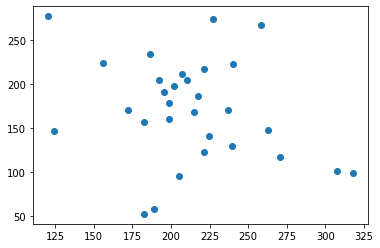

In [ ]:
frame = 100
plt.scatter(data_i[frame,:,0], data_i[frame,:,1])
plt.show()

Can you see the ant? It may be hard to see through just body points, so let's overly lay them on top of an image. If you look back at your data, each data sample has a corresponding avi video. We will parse the video and plot the corresponding image for a given frame with the bodypoitns.

In [ ]:
import skvideo.io

# create path for glob
data_path = "/content/gdrive/My Drive/First year/LS100/guide3/data/**"
video_path = f"{data_path}/*.avi"

for path in glob(video_path):
    videodata = skvideo.io.vread(path)
    print(videodata.shape)
    break

(776, 400, 400, 3)


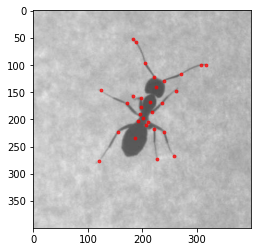

In [ ]:
frame = 100
plt.imshow(videodata[frame,:,:,:])
plt.scatter(data_i[frame,:,0], data_i[frame,:,1], s=8, c='r', alpha=0.7)
plt.show()

Now can you see the ant? Pretty neat right?! Now that you know exactly what the data looks like and what you can do with it, let me teach you two import preprocessing steps you should do before you do any analysis.

## 1. Preprocess
If you look at the body points again, you will notice that they are not centered at zero. If you just want to analyze the bodypoints relative to the stage, then you can go ahead and use the data. However, most of the time, you will want to analyze the body points relative to the center of the ant. You may even want your ants to be rotationally corrected as well so that the ant is always facing vertically. Both of these preprocessing step depend on what sort of question you are trying to answer. I will go ahead and teach both concepts so that you may look back on them later.

### 1.0 Translational Correction
In our model, body point 2 is the center of the ant. Therefore, we can just subtract all the body points to body point 2 so that the entire data is translated to zero.

#### Method 1

In [ ]:
# using for loops

# create copy of data_i
trans_data = np.copy(data_i)

# specify number of body points (bps) in ant
num_bps = 30

# loop through each bp, translating it so that the ant is centered around bp3 (index 2 corresponds to bp3)
for i in range(num_bps):
    trans_data[:,i,:] = data_i[:,i,:] - data_i[:,2,:]

print(trans_data.shape)

(776, 30, 2)


#### Method 2

In [ ]:
# using numpy array broadcasting
trans_data = data_i - data_i[:,2,:][:,np.newaxis,:]
print(trans_data.shape)

(776, 30, 2)


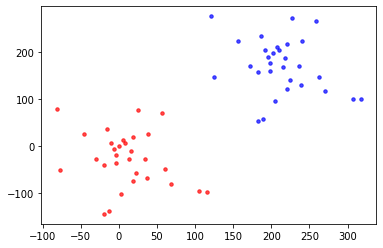

In [ ]:
frame = 100
plt.scatter(data_i[frame,:,0], data_i[frame,:,1], s=12, c='b', alpha=0.7)
plt.scatter(trans_data[frame,:,0], trans_data[frame,:,1], s=12, c='r', alpha=0.7)
plt.show()

### 1.1. Rotational Correction

Rotational correction is a little more complicated and requires some understanding of linera algebra. How you rotate your data points, as you probably know by now, depends on your model. Here, we are going to use body points 2 and 3 to create an axis that we will rotate so that it is always vertical. Note that the body points you use for other models may vary. We will then use the rotation matrix so that all the body points are aligned vertically.

First, watch this [video](https://www.youtube.com/watch?v=OYuoPTRVzxY) to understand how rotation matrix works.
Once you have watched this video, you should have a farily good grasp of how you can rotate any points in 2D by a certain degree. Now, you may be wondering how many angles should you rotate by? Well, the angle you will rotate the entire body points by will the angle between the body axis and the vertical line for each frame. Note: the angle for each frame will most likely differ, unless the ant is never turning.

![Rotation Matrix](img/RotationMatrix.gif)
![Rotation Matrix2](img/rotationmatrix2d.png)

(2, 2)


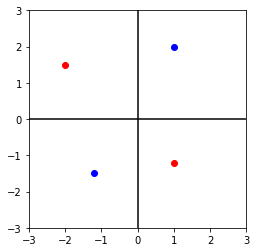

In [39]:
# ex: rotating two points by pi/2 radians

# set angle of rotation
angle = np.pi/2

# create original points
point1 = np.array([[1,2], [-1.2, -1.5]])

# create rotation matrix
rotation_matrix = np.array([[np.cos(angle), -1*np.sin(angle)], [np.sin(angle), np.cos(angle)]])
print(rotation_matrix.shape)

# rotate points
point2 = np.matmul(rotation_matrix, point1.T)

# plot points
fig, ax = plt.subplots()
ax.scatter(point1[:,0], point1[:,1], c='b')
ax.scatter(point2[:,0], point2[:,1], c='r')

# set axes range
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)
ax.set_aspect('equal')
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
plt.show()

Now you know how to rotate points, how do you calculate the angles that you need to rotate? Well, if we start out with the blue position and our axis is slanted, then we wanted to compute the angle theta between the ants axis and the vertical line.
<img src="img/angle.png" width="300"/>

In [ ]:
# compute ant's axis for each frame
axis = trans_data[:,1,:] - trans_data[:,2,:]

# compute angle between ant's axis and vertical axis
angles = np.sign(axis[:,0]) * np.pi/2 - np.arctan( axis[:,1]/axis[:,0] )

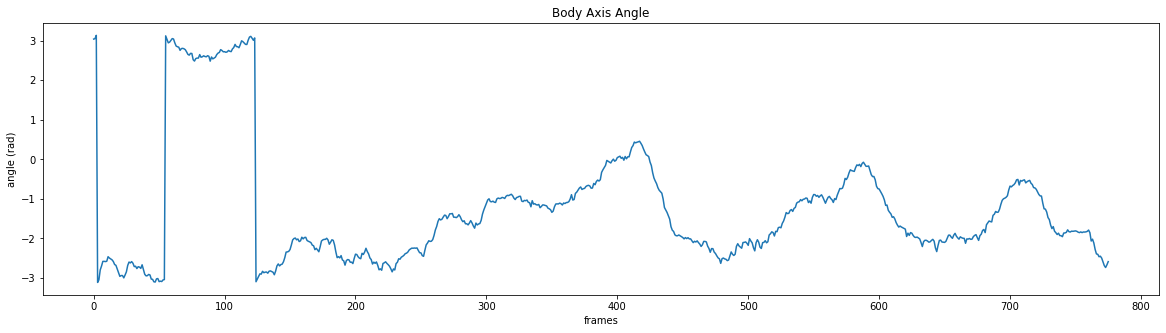

In [ ]:
fig, ax = plt.subplots(figsize=(20,5))
ax.plot(angles)
plt.title("Body Axis Angle")
plt.ylabel("angle (rad)")
plt.xlabel("frames")
plt.show()

Why do you think there are a few sharp vertical lines?

Now that we have the angles and the rotation matrix, we can finally rotate some body points!

In [ ]:
# rotate ant in frame 100 according to angles calculated above
frame = 100
angle = angles[frame]
rotation_matrix = np.array([[np.cos(angle), -1*np.sin(angle)], [np.sin(angle), np.cos(angle)]])
print(rotation_matrix.shape)
rot_data = np.matmul(rotation_matrix, trans_data[frame,:,:].T).T
print(rot_data.shape)

(2, 2)
(30, 2)


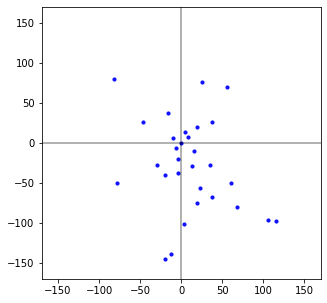

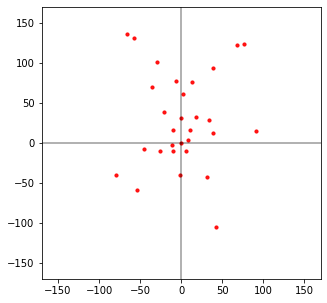

In [ ]:
fig, ax = plt.subplots(figsize=(5,5))
ax.axhline(y=0, color='k', alpha=0.4)
ax.axvline(x=0, color='k', alpha=0.4)
ax.scatter(trans_data[frame,:,0],trans_data[frame,:,1], c='b', s=10, alpha=0.9)
ax.set_xlim(-170, 170)
ax.set_ylim(-170, 170)
plt.show()

fig, ax = plt.subplots(figsize=(5,5))
ax.axhline(y=0, color='k', alpha=0.4)
ax.axvline(x=0, color='k', alpha=0.4)
ax.scatter(rot_data[:,0],rot_data[:,1], c='r', s=10, alpha=0.9)
ax.set_xlim(-170, 170)
ax.set_ylim(-170, 170)
plt.show()